In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('xtick', labelsize=20)
rc('ytick', labelsize=20)

from transit_model import *

### Load the Lurie (2017) EB catalog

In [2]:
cat = pd.read_csv("catalogs/lurie_ebs.csv.gz")
cat = cat[cat['Porb'] < 16]
cat.head()

,KIC,Porb,Class,PACF,hACF,P1min,P1max,P2min,P2max,h1min,h1max,h2min,h2max,Note
0,1026032,8.460,sp,10.932,0.588,10.778,11.162,NaN,NaN,0.060,0.078,NaN,NaN,NaN
2,1161345,8.575,sp,7.969,0.381,7.994,8.227,NaN,NaN,0.089,0.041,NaN,NaN,NaN
3,1575690,2.252,sp,2.248,1.390,2.243,2.256,NaN,NaN,0.109,0.351,NaN,NaN,NaN
5,2019076,7.129,sp,8.623,0.787,8.188,8.325,9.623,NaN,0.165,0.050,0.122,NaN,NaN
6,2162994,4.102,sp,4.066,0.324,4.054,4.108,4.195,NaN,0.034,0.026,0.030,NaN,NaN


### Fit best model and plot

In [4]:
idx = 6
ID = list(cat['KIC'])[idx]
porb = list(cat['Porb'])[idx]
KICID = f"KIC {ID}"
print(porb)
print(KICID)

t0, sol, chi_fit, wbest, lc_raw, lc_flat, lc_fold = fit_best_window(KICID, porb)
dur1, dur2 = est_duration(sol, bound=1e-3)
print(dur1, dur2)

1.362
KIC 2305543
0.14900301045474432 0.14936304523195076


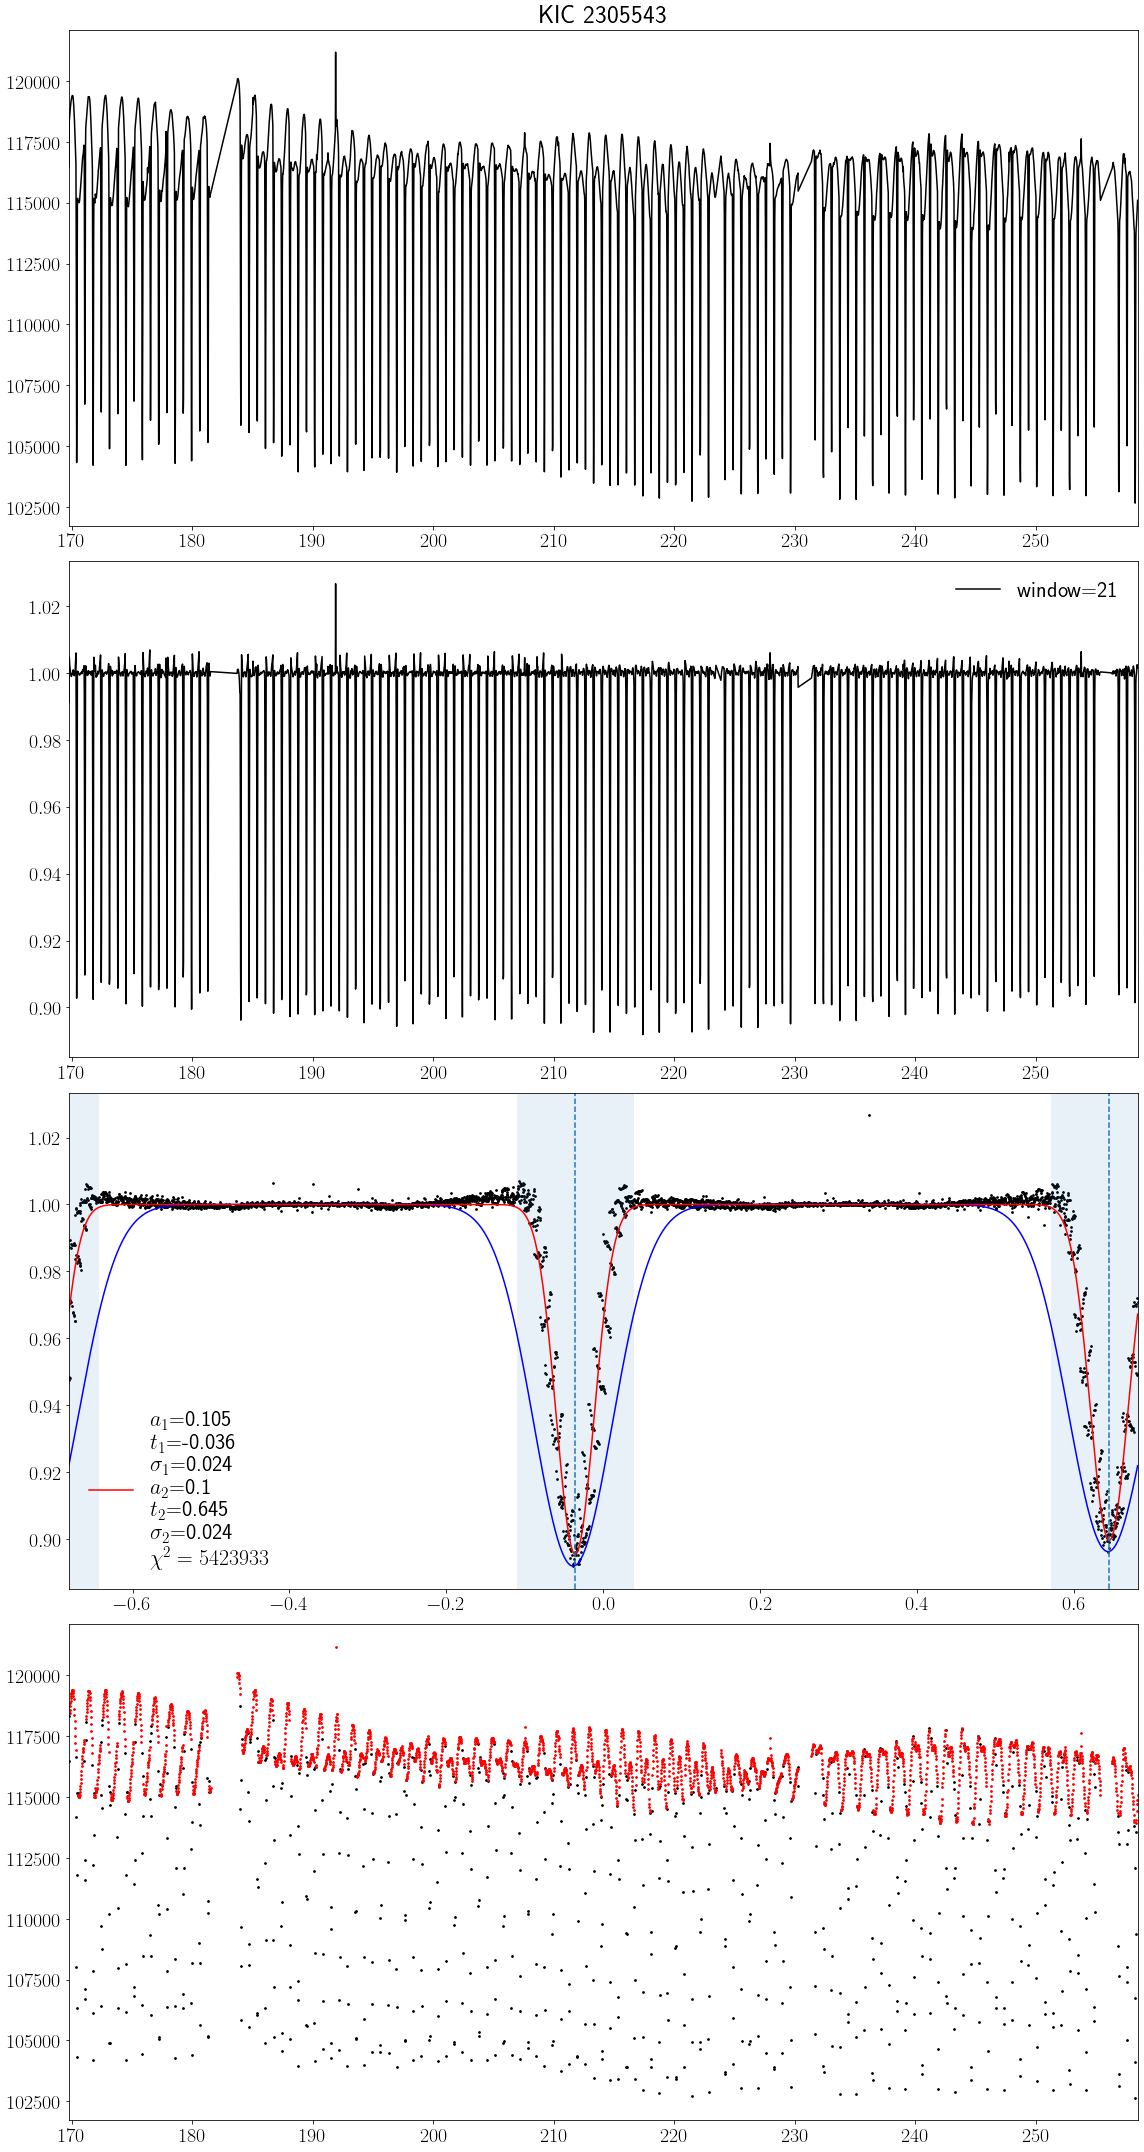

In [5]:
fig = plot_best_fit(KICID, porb, t0, sol, chi_fit, wbest, lc_raw, lc_flat, lc_fold, show=True)
# fig.savefig(f'plots/{KICID}.png')

KIC 2167890
KIC 2438490
KIC 2445975
KIC 3351945


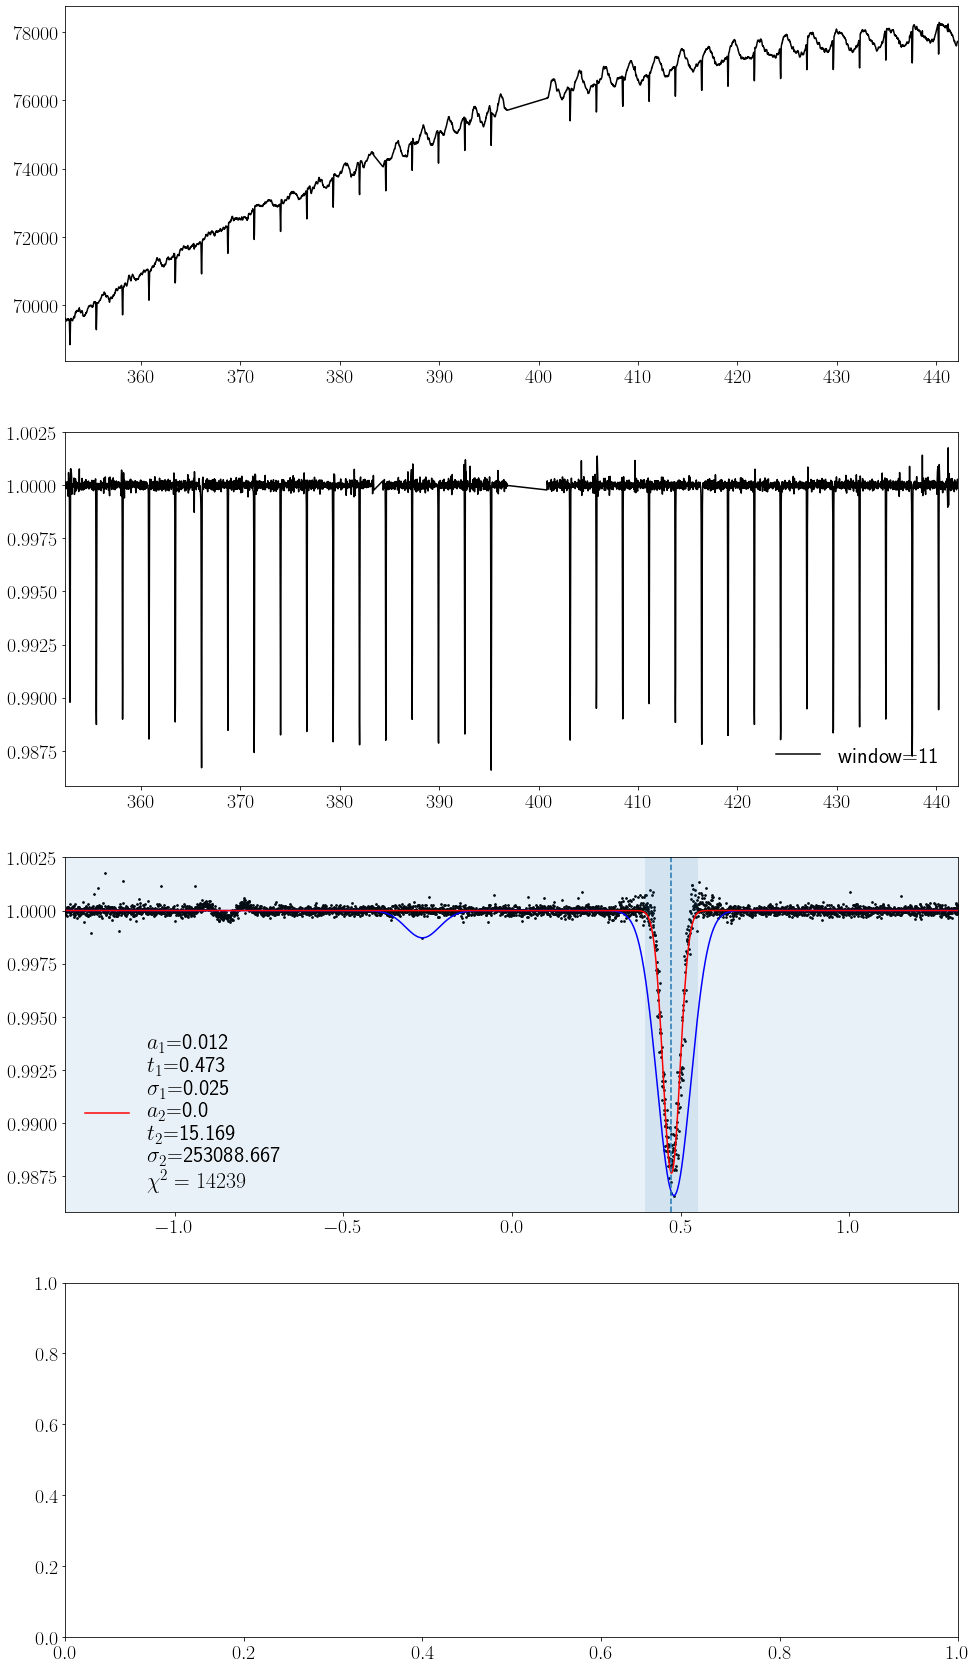

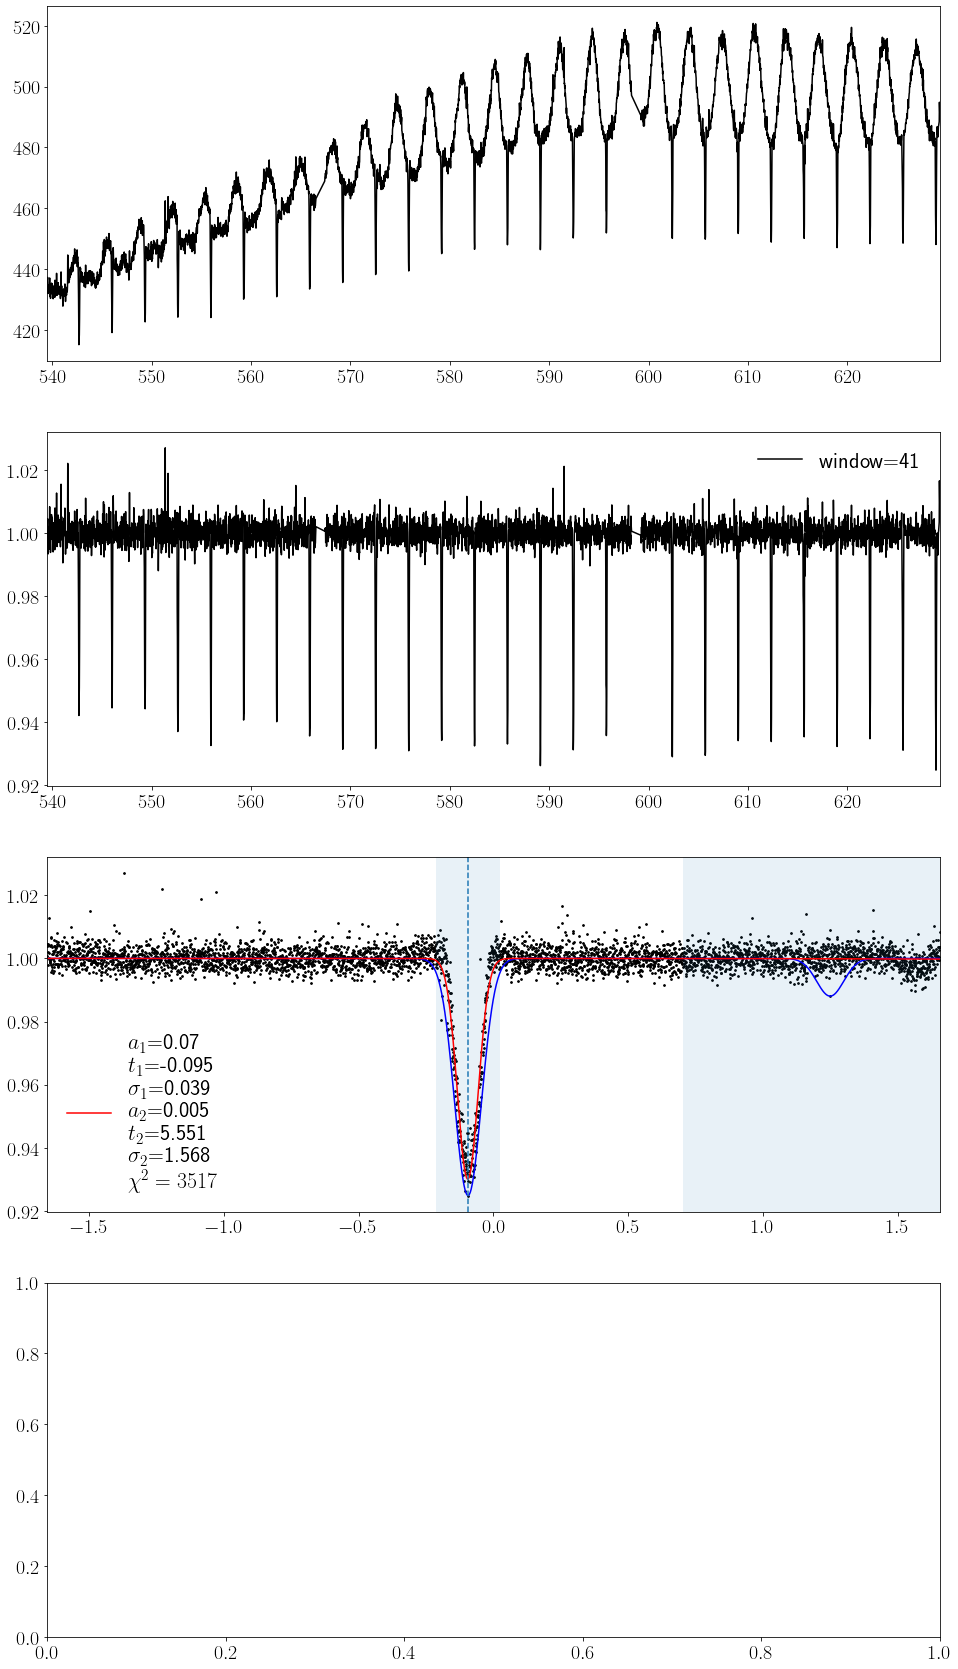

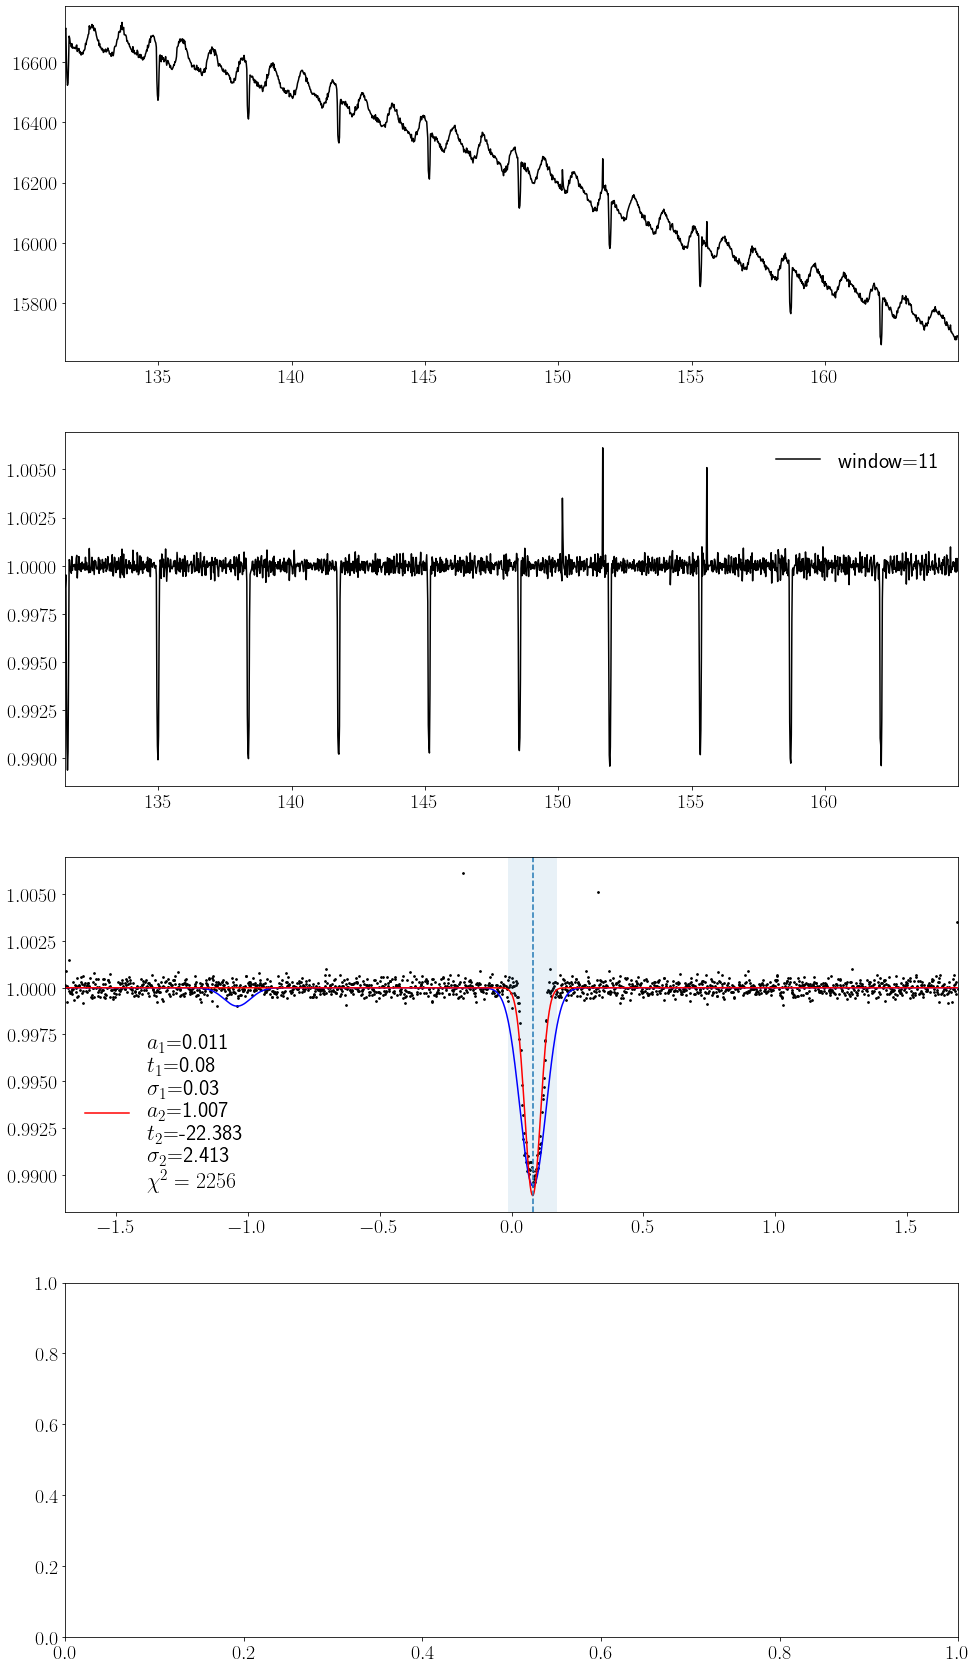

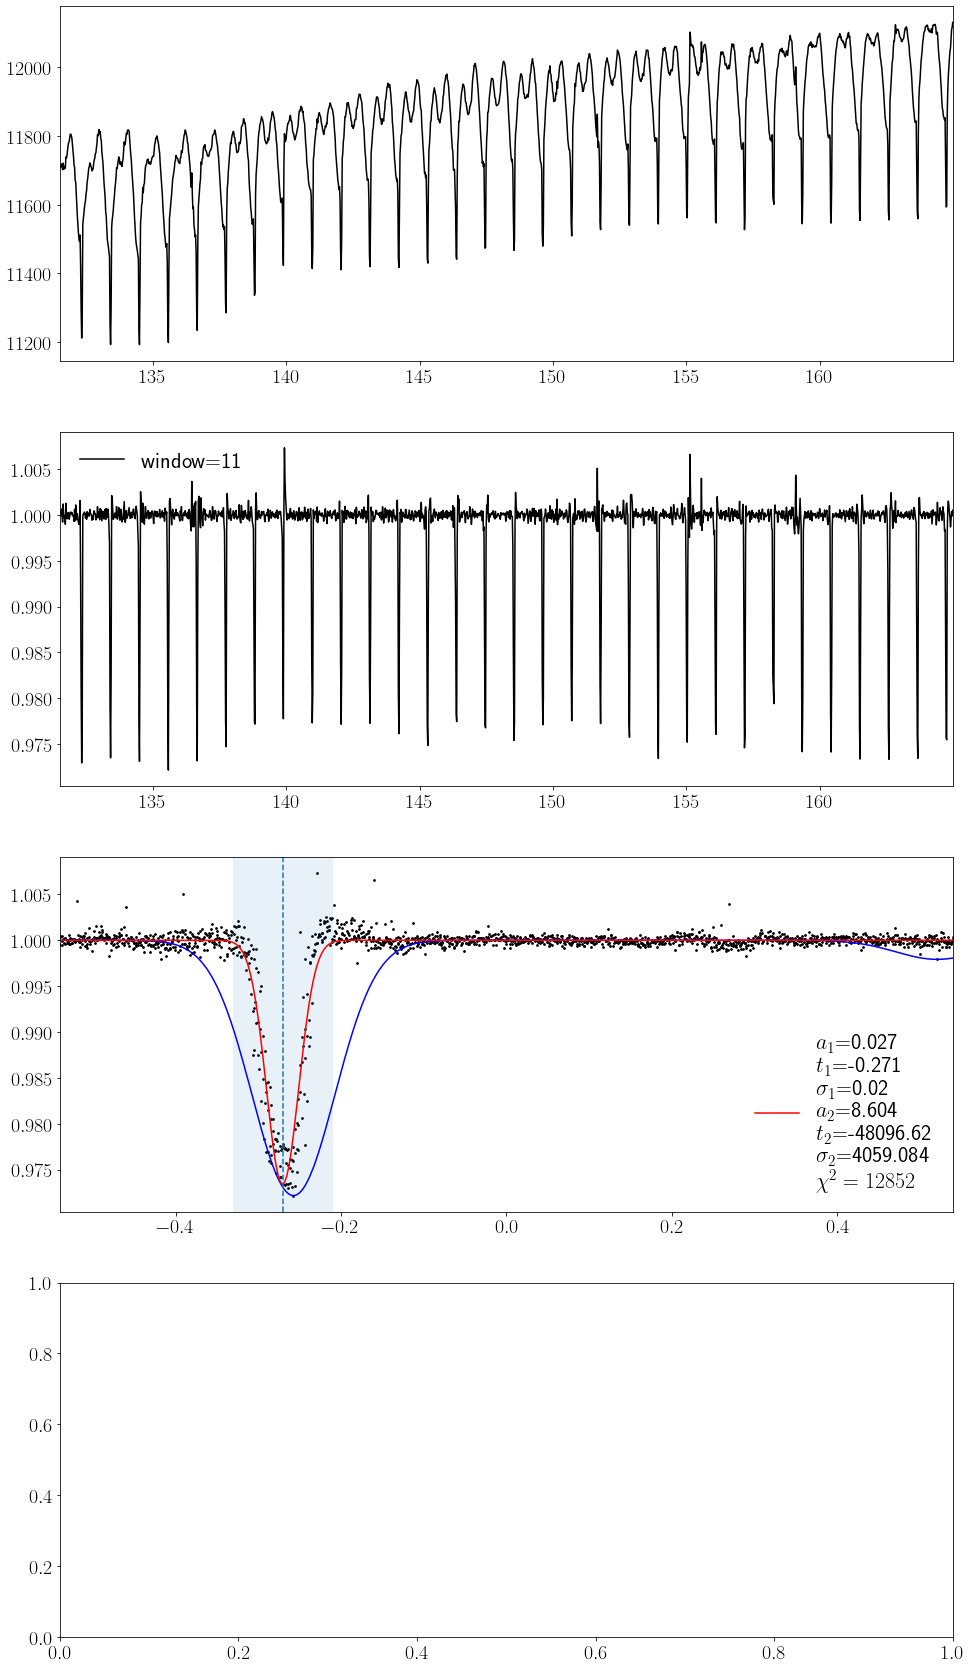

In [247]:
sample = {'KIC': [], 'Porb': [], 'sol': [], 'chi_fit': [], 'window': [],
          'dur1': [], 'dur2': []}

for idx in range(50):
    try:
        KICID = f"KIC {list(cat['KIC'])[idx]}"
        porb = list(cat['Porb'])[idx]

        t0, sol, chi_fit, wbest, lc_raw, lc_flat, lc_fold = fit_best_window(KICID, porb)
        dur1, dur2 = est_duration(sol, bound=1e-3)

        fig = plot_best_fit(KICID, t0, sol, chi_fit, wbest, lc_raw, lc_flat, lc_fold, show=False)
        fig.savefig(f'plots/{KICID}.png')

        sample['KIC'].append(list(cat['KIC'])[idx])
        sample['Porb'].append(porb)
        sample['sol'].append(sol)
        sample['chi_fit'].append(chi_fit)
        sample['window'].append(wbest)
        sample['dur1'].append(dur1)
        sample['dur2'].append(dur2)
    except:
        print(KICID)

In [252]:
results = pd.DataFrame(data=sample)
results.head()

,KIC,Porb,sol,chi_fit,window,dur1,dur2
0,1026032,8.460,"[0.07812933144293782, 2.2624494484597424, 0.04...",2951.006689,51,0.268101,0.268898
1,1161345,8.575,"[0.0009479331856230616, -0.07922625727763603, ...",3146.901109,11,0.115331,0.101233
2,1575690,2.252,"[0.029509964532599294, 0.8045050765706657, 0.0...",9277.545813,11,0.112747,0.105139
3,2019076,7.129,"[0.09659385776456089, 1.308314793309372, 0.033...",35414.445293,51,0.204700,0.210061
4,2162994,4.102,"[0.37759392757566146, 1.1185587957908065, 0.05...",467105.711312,11,0.323253,0.336157
